In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 22 07:05:30 2017

@author: angusurquhart
Extract meta data from trackobot
"""
from collections import defaultdict
import trackopy
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
from sqlalchemy import create_engine


In [2]:
#Setup trackobot
user = {"password":'e479deb2e1', 'username':'still-gnoll-6604'}
trackobot = trackopy.Trackobot(user['username'], user['password'])

In [3]:
#trackobot.history(page=7)

In [16]:
#Put all the pages into a single dictionary
#Note that this is game level data - 'history'
singledict = {}
list_of_game_dicts = []

for x in range(1,8):

     singledict[1] = trackobot.history(page=x)
     list_of_game_dicts.append(singledict.copy())
    
list_of_game_dicts

[{1: {'history': [{'added': '2017-06-08T06:37:13.000Z',
     'card_history': [{'card': {'id': 'UNG_205',
        'mana': 1,
        'name': 'Glacial Shard'},
       'player': 'me',
       'turn': 1},
      {'card': {'id': 'CS2_034', 'mana': 2, 'name': 'Fireblast'},
       'player': 'opponent',
       'turn': 2},
      {'card': {'id': 'CS2_049', 'mana': 2, 'name': 'Totemic Call'},
       'player': 'me',
       'turn': 2},
      {'card': {'id': 'UNG_024', 'mana': 3, 'name': 'Mana Bind'},
       'player': 'opponent',
       'turn': 3},
      {'card': {'id': 'GAME_005', 'mana': 0, 'name': 'The Coin'},
       'player': 'me',
       'turn': 3},
      {'card': {'id': 'CFM_715', 'mana': 4, 'name': 'Jade Spirit'},
       'player': 'me',
       'turn': 3},
      {'card': {'id': 'NEW1_012', 'mana': 1, 'name': 'Mana Wyrm'},
       'player': 'opponent',
       'turn': 4},
      {'card': {'id': 'GAME_005', 'mana': 0, 'name': 'The Coin'},
       'player': 'opponent',
       'turn': 4},
      {'card':

In [17]:
#this shows that i can access a single page
#I'll come back to this and loop over it once I have my output ready
page = list_of_game_dicts[0]
page

{1: {'history': [{'added': '2017-06-08T06:37:13.000Z',
    'card_history': [{'card': {'id': 'UNG_205',
       'mana': 1,
       'name': 'Glacial Shard'},
      'player': 'me',
      'turn': 1},
     {'card': {'id': 'CS2_034', 'mana': 2, 'name': 'Fireblast'},
      'player': 'opponent',
      'turn': 2},
     {'card': {'id': 'CS2_049', 'mana': 2, 'name': 'Totemic Call'},
      'player': 'me',
      'turn': 2},
     {'card': {'id': 'UNG_024', 'mana': 3, 'name': 'Mana Bind'},
      'player': 'opponent',
      'turn': 3},
     {'card': {'id': 'GAME_005', 'mana': 0, 'name': 'The Coin'},
      'player': 'me',
      'turn': 3},
     {'card': {'id': 'CFM_715', 'mana': 4, 'name': 'Jade Spirit'},
      'player': 'me',
      'turn': 3},
     {'card': {'id': 'NEW1_012', 'mana': 1, 'name': 'Mana Wyrm'},
      'player': 'opponent',
      'turn': 4},
     {'card': {'id': 'GAME_005', 'mana': 0, 'name': 'The Coin'},
      'player': 'opponent',
      'turn': 4},
     {'card': {'id': 'CS2_024', 'mana': 2

In [18]:
#this shows the level at which useful data is containted
#the meta stuff in this case is pretty useless - the real info is in the history.
page[1].keys()

dict_keys(['meta', 'history'])

In [19]:
#This is actually the data we'll want to flatten into a table
page[1]['history']

[{'added': '2017-06-08T06:37:13.000Z',
  'card_history': [{'card': {'id': 'UNG_205',
     'mana': 1,
     'name': 'Glacial Shard'},
    'player': 'me',
    'turn': 1},
   {'card': {'id': 'CS2_034', 'mana': 2, 'name': 'Fireblast'},
    'player': 'opponent',
    'turn': 2},
   {'card': {'id': 'CS2_049', 'mana': 2, 'name': 'Totemic Call'},
    'player': 'me',
    'turn': 2},
   {'card': {'id': 'UNG_024', 'mana': 3, 'name': 'Mana Bind'},
    'player': 'opponent',
    'turn': 3},
   {'card': {'id': 'GAME_005', 'mana': 0, 'name': 'The Coin'},
    'player': 'me',
    'turn': 3},
   {'card': {'id': 'CFM_715', 'mana': 4, 'name': 'Jade Spirit'},
    'player': 'me',
    'turn': 3},
   {'card': {'id': 'NEW1_012', 'mana': 1, 'name': 'Mana Wyrm'},
    'player': 'opponent',
    'turn': 4},
   {'card': {'id': 'GAME_005', 'mana': 0, 'name': 'The Coin'},
    'player': 'opponent',
    'turn': 4},
   {'card': {'id': 'CS2_024', 'mana': 2, 'name': 'Frostbolt'},
    'player': 'opponent',
    'turn': 4},
   {

In [20]:
#This is the meta data for a single game
page[1]['history'][0]

{'added': '2017-06-08T06:37:13.000Z',
 'card_history': [{'card': {'id': 'UNG_205',
    'mana': 1,
    'name': 'Glacial Shard'},
   'player': 'me',
   'turn': 1},
  {'card': {'id': 'CS2_034', 'mana': 2, 'name': 'Fireblast'},
   'player': 'opponent',
   'turn': 2},
  {'card': {'id': 'CS2_049', 'mana': 2, 'name': 'Totemic Call'},
   'player': 'me',
   'turn': 2},
  {'card': {'id': 'UNG_024', 'mana': 3, 'name': 'Mana Bind'},
   'player': 'opponent',
   'turn': 3},
  {'card': {'id': 'GAME_005', 'mana': 0, 'name': 'The Coin'},
   'player': 'me',
   'turn': 3},
  {'card': {'id': 'CFM_715', 'mana': 4, 'name': 'Jade Spirit'},
   'player': 'me',
   'turn': 3},
  {'card': {'id': 'NEW1_012', 'mana': 1, 'name': 'Mana Wyrm'},
   'player': 'opponent',
   'turn': 4},
  {'card': {'id': 'GAME_005', 'mana': 0, 'name': 'The Coin'},
   'player': 'opponent',
   'turn': 4},
  {'card': {'id': 'CS2_024', 'mana': 2, 'name': 'Frostbolt'},
   'player': 'opponent',
   'turn': 4},
  {'card': {'id': 'EX1_238', 'mana

In [21]:
#This is the id for a single game
page[1]['history'][0]['id']

80313833

In [22]:
#Build a dataframe of page 1 meta info
df = pd.DataFrame(page[1]['history'], columns=['added','coin', 'duration','hero','hero_deck','id','legend','mode','note','opponent','opponent_deck','rank','result'])
df

,added,coin,duration,hero,hero_deck,id,legend,mode,note,opponent,opponent_deck,rank,result
0,2017-06-08T06:37:13.000Z,True,223,Shaman,None,80313833,None,ranked,None,Mage,None,NaN,win
1,2017-06-07T21:16:51.000Z,False,677,Shaman,Midrange,80284898,None,ranked,None,Druid,None,NaN,win
2,2017-06-07T21:05:14.000Z,False,689,Shaman,Midrange,80283875,None,ranked,None,Shaman,Control,NaN,loss
3,2017-06-07T06:31:04.000Z,True,1287,Priest,Dragon,80203851,None,ranked,None,Mage,None,NaN,loss
4,2017-06-05T06:24:49.000Z,True,614,Priest,Dragon,79956734,None,ranked,None,Rogue,Quest,18,loss
5,2017-06-05T06:14:26.000Z,False,81,Priest,None,79956227,None,ranked,None,Warrior,None,18,win
6,2017-06-04T19:25:24.000Z,True,485,Paladin,Murloc,79908645,None,ranked,None,Warrior,Pirate,18,win
7,2017-06-04T19:17:04.000Z,False,233,Paladin,Murloc,79907646,None,ranked,None,Hunter,Midrange,NaN,win
8,2017-06-04T19:13:00.000Z,False,739,Paladin,Murloc,79907191,None,ranked,None,Priest,Combo,NaN,win
9,2017-06-04T17:47:43.000Z,True,233,Paladin,Murloc,79897192,None,ranked,None,Mage,None,NaN,win


In [46]:
#Create an empty dataframe for all the meta game fields
columns = ['added','coin', 'duration','hero','hero_deck','id','legend','mode','note','opponent','opponent_deck','rank','result']
metatable = pd.DataFrame(columns=columns)
metatable
metatable.shape

(0, 13)

In [47]:
#This will now loop through and create my meta table
for i in range(len(list_of_game_dicts)):
    metatable = metatable.append(pd.DataFrame(list_of_game_dicts[i][1]['history'], columns=['added','coin', 'duration','hero',
                                                                                        'hero_deck','id','legend','mode','note',
                                                                                        'opponent','opponent_deck','rank','result']
                                         ),ignore_index = True)

metatable.shape


(105, 13)

In [58]:
#I want to do some pre-work to tidy up fields for an import into sql
#Alytic doesn't like true false fields so change to text
metatable['coin'] = metatable['coin'].replace(True,'Go First')
metatable['coin'] = metatable['coin'].replace(False,'Go Second')

#I want a field for wins and losses so that I can do wins as a % of total
dummy_result = pd.get_dummies(metatable['result'], prefix='result')
#dummy_result.head()
metatable = pd.concat([metatable, dummy_result], axis=1)

#Drop useless columns
metatable = metatable.drop('legend', 1)
metatable = metatable.drop('note', 1)

#Add some fields for counting games
metatable['Game Counter/100'] = 0.01
metatable['Game Counter'] = 1

#Add date field
#metatable['Date'] = pd.to_datetime(metatable['added'], format = '%d/%m/%Y',exact = False)
#metatable['just_date'] = metatable['added'].dt.date

metatable.head()
#metatable.dtypes
                       

,added,coin,duration,hero,hero_deck,id,mode,opponent,opponent_deck,rank,...,result_loss,result_win,result_loss,result_win,result_loss,result_win,result_loss,result_win,result_loss,result_win
0,2017-06-08T06:37:13.000Z,Go First,223,Shaman,None,80313833,ranked,Mage,None,NaN,...,0,1,0,1,0,1,0,1,0,1
1,2017-06-07T21:16:51.000Z,Go Second,677,Shaman,Midrange,80284898,ranked,Druid,None,NaN,...,0,1,0,1,0,1,0,1,0,1
2,2017-06-07T21:05:14.000Z,Go Second,689,Shaman,Midrange,80283875,ranked,Shaman,Control,NaN,...,1,0,1,0,1,0,1,0,1,0
3,2017-06-07T06:31:04.000Z,Go First,1287,Priest,Dragon,80203851,ranked,Mage,None,NaN,...,1,0,1,0,1,0,1,0,1,0
4,2017-06-05T06:24:49.000Z,Go First,614,Priest,Dragon,79956734,ranked,Rogue,Quest,18,...,1,0,1,0,1,0,1,0,1,0


In [59]:
#At this stage I'd actually like to write my data to sql
conn_string = "mssql+pymssql://" + '192.168.1.52' + "/" + 'naturex'
engine = create_engine(conn_string)
conn = engine.connect()
metatable.to_sql('HS_MetaTable', engine, if_exists='replace', index=False, schema='dbo')


In [14]:
 #metatable.sort_values('added')

In [16]:
#Now i want to look at my wins vs. my losses
#totalresults = metatable.groupby(['result'])['id'].agg(['count'])
#colors = ['red','green']
#totalresults.plot.bar(color = colors)

In [17]:
#Also which heros have i been using and what are my win losses:
#wins_by_hero = metatable.groupby(['hero','result'])['id'].agg(['count'])
#bar_width = 0.35
#wins_by_hero.plot.bar()
#wins_by_hero.plot.bar(color = colors)

AttributeError: 'function' object has no attribute 'bar'

In [18]:
#Want to rename some fields, in particular, rank which is used for other commands
metatable = metatable.rename(columns={'rank': 'H_rank'})

In [19]:
#describe gets you some summary stats of metrics.  We don' actually have many metrics 
#in this data so it doesn't work as well.
metatable.describe()

,duration,id,H_rank
count,105.000000,105.000000,25.00000
mean,666.876190,74102011.152381,16.56000
std,1155.944217,5797519.198294,1.75784
min,59.000000,66603498.000000,15.00000
25%,372.000000,67158722.000000,15.00000
50%,521.000000,78246669.000000,15.00000
75%,708.000000,78925591.000000,18.00000
max,12010.000000,80203851.000000,21.00000


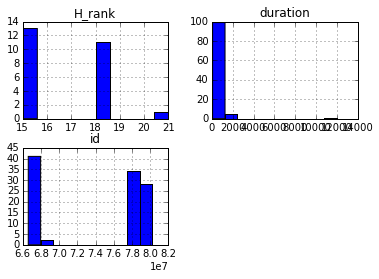

In [20]:
# plot all of the columns
metatable.hist()
pl.show()

In [21]:
# i now need to turn categorical fields into crosstabs
# dummify hero
dummy_hero = pd.get_dummies(metatable['hero'], prefix='hero')
dummy_hero.head()

,hero_Druid,hero_Hunter,hero_Mage,hero_Paladin,hero_Priest,hero_Shaman,hero_Warlock,hero_Warrior
0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0


In [22]:
#Now apply this back to dataframe and r,emove original hero
cols_to_keep = ['result','duration']
meta_log_reg = pd.concat([metatable[cols_to_keep], dummy_hero], axis=1)
#meta_log_reg = metatable[cols_to_keep].join(dummy_hero.ix[:, 'prestige_2':])
meta_log_reg.head()

,result,duration,hero_Druid,hero_Hunter,hero_Mage,hero_Paladin,hero_Priest,hero_Shaman,hero_Warlock,hero_Warrior
0,loss,1287,0,0,0,0,1,0,0,0
1,loss,614,0,0,0,0,1,0,0,0
2,win,81,0,0,0,0,1,0,0,0
3,win,485,0,0,0,1,0,0,0,0
4,win,233,0,0,0,1,0,0,0,0


In [23]:
# manually add the intercept
#add a constant term for our Logistic Regression. 
#The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.
meta_log_reg['intercept'] = 1.0

In [24]:
#convert the wins and losses to 1 and 0
meta_log_reg['result'] = meta_log_reg['result'].replace('loss', 0)
meta_log_reg['result'] = meta_log_reg['result'].replace('win', 1)
#meta_log_reg['result'] = pd.to_numeric(meta_log_reg['result'])
meta_log_reg.head()

,result,duration,hero_Druid,hero_Hunter,hero_Mage,hero_Paladin,hero_Priest,hero_Shaman,hero_Warlock,hero_Warrior,intercept
0,0,1287,0,0,0,0,1,0,0,0,1
1,0,614,0,0,0,0,1,0,0,0,1
2,1,81,0,0,0,0,1,0,0,0,1
3,1,485,0,0,0,1,0,0,0,0,1
4,1,233,0,0,0,1,0,0,0,0,1


In [26]:
#train_cols = meta_log_reg.columns[1:8]
#logit = sm.Logit(meta_log_reg['result'], meta_log_reg[train_cols])

# fit the model
#result = logit.fit()
#result.summary()

In [27]:
metatable.

,added,coin,duration,hero,hero_deck,id,legend,mode,note,opponent,opponent_deck,H_rank,result
0,2017-06-07T06:31:04.000Z,True,1287,Priest,Dragon,80203851,NaN,ranked,None,Mage,None,NaN,loss
1,2017-06-05T06:24:49.000Z,True,614,Priest,Dragon,79956734,NaN,ranked,None,Rogue,Quest,18,loss
2,2017-06-05T06:14:26.000Z,False,81,Priest,None,79956227,NaN,ranked,None,Warrior,None,18,win
3,2017-06-04T19:25:24.000Z,True,485,Paladin,Murloc,79908645,NaN,ranked,None,Warrior,Pirate,18,win
4,2017-06-04T19:17:04.000Z,False,233,Paladin,Murloc,79907646,NaN,ranked,None,Hunter,Midrange,NaN,win
5,2017-06-04T19:13:00.000Z,False,739,Paladin,Murloc,79907191,NaN,ranked,None,Priest,Combo,NaN,win
6,2017-06-04T17:47:43.000Z,True,233,Paladin,Murloc,79897192,NaN,ranked,None,Mage,None,NaN,win
7,2017-06-04T17:43:40.000Z,True,390,Paladin,Murloc,79896753,NaN,ranked,None,Mage,None,NaN,loss
8,2017-06-04T08:08:53.000Z,False,659,Priest,Miracle,79833849,NaN,ranked,None,Hunter,Midrange,NaN,win
9,2017-06-04T07:01:11.000Z,False,372,Priest,Miracle,79829285,NaN,ranked,None,Paladin,Murloc,NaN,loss
